<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Chicago West Nile Virus Prediction

### Contents:
#### Part 1 (of 4)
- [Executive Summary](#Executive-Summary)
- [Problem Statement](#Problem-Statement)
- [Background & Research](#Background-&-Research)
- [Data Wrangling](#Data-Wrangling)
- Exploration & Visualisation
- Pre-Processing & Modelling
- Results & Analysis
- Kaggle Prediction
- Cost-Benefit Analysis
- Recommendations
- Conclusions
- References

## Executive Summary

The West Nile Virus (WNV) is a mosquito-borne disease commonly transmitted to humans by the bite of an infected mosquitos. Weather conditions including temperature, relative humidity, precipitation and wind may affect the survival and reproduction rates of mosquitos, increasing the chances of spreading the WNV. Given that the WNV is a key public health challenge in the United States, we aim to train a classification model based on the weather conditions, species of mosquitos and locations of the traps to predict whether the WNV would be present at a specific location, which will support us in developing an effective plan to deploy pesticides throughout the city. A total of 4 models were evaluated - (i) Logistic Regression; (ii) Support Vector Machine; (iii) K-Nearest Neighbors; and (iv) Random Forest Classifier. A summary of the results are as follows. 

| Optimized Model          |Training Accuracy | Testing Accuracy | Training Recall Score | Testing Recall Score |AUC Score |
|:-----------------------:|:----------------:|:----------------:|:------------:|:---------:|:---------:|
| Logistic Regression     |      0.640       |      0.657       |    0.816     |   0.818 |     0.79    |
| Support Vector Machine  |      0.831       |      0.781       |    0.991     | 0.562  |     0.78    | 
| K-Nearest Neighbors     |      0.947       |      0.947       |    0.009     | 0.000  |     0.73    |
| Random Forest Classifier|      0.901       |      0.863       |    0.772     | 0.307  |     0.68    |


We decided on the Logistic Regression model as it has the highest AUC and recall score. Optimizing recall score means that our model is able to minimize False Negatives which is critical as the impact of incorrectly predicting an area without WNV when it actually has could be detrimental to the health of the people if measures to curb the WNV were not implemented. We also conducted a cost-benefit analysis where cost is defined as the total expenditure associated with spraying pesticide on adult mosquitoes in incurred in a year, while benefits will be measured by the cost avoidance or savings in the form of healthcare costs and productivity lost associated with the potential reduction in number of human WNV cases from spraying pesticide in Chicago. Based on our analysis, we strongly recommend IDPH to control mosquitoes population in Chicago by spraying pesticide in a more targeted fashion. In conclusion, we think that the model can give us a good prediction of the areas that have a higher presence of WNV so that we can target the spraying of pesticide at these high-risk areas more regularly to control the mosquito population and reduce the presence of WNV. To take this project further, we could explore improving the model by performing over-sampling on the minority class (positive cases). We could also factor in the benefit derived (in terms of the cost saved) not just from reducing cases of WNV but also other forms of mosquito-borne diseases such as Zika, Chikungunya, dengue, and malaria. Lastly, the predictive model can be modified and applied to help predict and direct spray efforts in other cities of the USA.

## Problem Statement

We work for Disease And Treatment Agency, in the division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Due to the recent epidemic of West Nile Virus in the Windy City, the Illinois Department of Public Health (IDPH) has set up a surveillance and control system. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive. As part of setting up the control system, IDPH has engaged our agency to devise a cost-effective plan to deploy pesticides throughout the city. A cost-effective plan will provide insights for IDPH to make sound funding and policy decisions in combating WNV in Chicago.

Using weather, location, testing, and spraying data, we set out to achieve the following:
1. Create a few classification models, including Logistic Regression, K-Nearest Neighbour, Random Forest Classifier, Linear Support Vector Machine (SVM) to predict when and where different species of mosquitos will test positive for West Nile virus.
2. Evaluate the performance of the models using area under curve (AUC), accuracy and recall as the key metrics, and recommend a suitable model for prediction. A suitable model is one which outperforms the baseline model with higher AUC, accuracy and recall. 
3. Perform a cost-benefit analysis to determine the potential trade-off between spraying pesticide and the number of human WNV cases in Chicago.
4. Recommend a cost-effective plan to guide when, where and how much pesticide to spray to minimize incidence of WNV in mosquitoes.

## Background & Research

It was summer 1999 in New York City. There was an outbreak of a human virus which caused brain damage that can lead to death. Crows were seen falling from the sky. Many exotic birds at a zoological park were suddenly dying [(source)](https://science.sciencemag.org/content/286/5448/2333.abstract). These scenes marked the beginning of the West Nile Virus (WNV) in the United States (U.S.). The WNV is a mosquito-borne disease and is commonly transmitted to humans by the bite of an infected mosquito. It cannot be spread from human to human.

Today, it has become the leading cause of mosquito-borne disease and a key public health challenge in the United States. Around 80% of those infected typically display few or no symptoms. About 20% of infected people develop a fever, vomiting, or a rash. In the remaining less than 1% of those infected suffer from neuroinvasive disease (e.g encephalitis or meningitis). The mortality rate among those who suffer from neuroinvasive disease is estimated to be 10% [(source)](https://www.cdc.gov/westnile/index.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fwestnile%2Ffaq%2FgenQuestions.html). From 1999 to 2012, it is estimated that a cumulative of 778 million USD in health care expenditures and lost productivity were incurred from hospitalized cases [(source)](https://www.ajtmh.org/view/journals/tpmd/90/3/article-p402.xml).

Infection with West Nile Virus is seasonal in temperate zones like the U.S. Weather conditions including temperature, precipitation and wind may affect the survival and reproduction rates of mosquitoes, suitable habitats, distribution, and abundance.  

## Data Wrangling

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)

### Data Sources

The following data sources were used:

* [`train.csv`](../assets/input/train.csv): Trap Locations Training Dataset (2007, 2009, 2011, 2013)

> This dataset contains information on the mosquito traps set up in Chicago for the following years: 2007, 2009, 2011, 2013 (with data on the presence or absence of West Nile Virus in the traps for model training). More information [here](https://www.kaggle.com/c/predict-west-nile-virus/data).

* [`weather.csv`](../assets/input/weather.csv): Weather Station Readings Dataset (2007 to 2014)

> This dataset contains information on the weather conditions in Chicago from 2 weather stations between the years: 2007 and 2014. More information [here](https://www.kaggle.com/c/predict-west-nile-virus/data). A description of the columns in the weather dataset can be found [here](../assets/input/noaa_weather_qclcd_documentation.pdf).

* [`spray.csv`](../assets/input/spray.csv): Spray Locations Dataset (2011, 2013)

> This dataset contains information on the spray efforts conducted in Chicago for the following years: 2011, 2013. More information [here](https://www.kaggle.com/c/predict-west-nile-virus/data).

* [`test.csv`](../assets/input/test.csv): Trap Locations Testing Dataset (2008, 2010, 2012, 2014)

> This dataset contains information on the mosquito traps set up in Chicago for the following years: 2008, 2010, 2012, 2014 (without data on the presence or absence of West Nile Virus in the traps for prediction challenge). More information [here](https://www.kaggle.com/c/predict-west-nile-virus/data).

### Data Importing

#### Import Train Dataset (as Trap Dataset)

In [2]:
# import csv file as dataframe
trap = pd.read_csv('../assets/input/train.csv')

#### Import Weather Dataset

In [3]:
# import csv file as dataframe
weather = pd.read_csv('../assets/input/weather.csv')

#### Import Spray Dataset

In [4]:
# import csv file as dataframe
spray = pd.read_csv('../assets/input/spray.csv')

#### Import Test Dataset (as Kaggle Dataset)

In [5]:
# import csv file as dataframe
kaggle = pd.read_csv('../assets/input/test.csv')

### Data Cleaning

#### Clean Trap Dataset

In [6]:
# check out first 5 rows
trap.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [7]:
# check out shape
trap.shape

(10506, 12)

In [8]:
# check for duplicates
trap[trap.duplicated()]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2013-08-29,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,50,1
10102,2013-09-06,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX PIPIENS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9,9,0
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,1
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0


In [9]:
# drop duplicates
print('Shape Before Dropping Duplicates:', trap.shape)
trap.drop_duplicates(ignore_index=True, inplace=True)
print('Shape After Dropping Duplicates:', trap.shape)

Shape Before Dropping Duplicates: (10506, 12)
Shape After Dropping Duplicates: (9693, 12)


In [10]:
# drop unnecessary columns
trap.drop(columns=['Block', 'Street', 'Address', 'AddressNumberAndStreet', 'AddressAccuracy'], inplace=True)

In [11]:
# convert date column to datetime
trap['Date'] = pd.to_datetime(trap['Date'])

# trap.set_index('Date', inplace=True)

In [12]:
# check out data types of columns
trap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9693 non-null   datetime64[ns]
 1   Species       9693 non-null   object        
 2   Trap          9693 non-null   object        
 3   Latitude      9693 non-null   float64       
 4   Longitude     9693 non-null   float64       
 5   NumMosquitos  9693 non-null   int64         
 6   WnvPresent    9693 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 530.2+ KB


In [13]:
# check for null values
trap.isnull().sum().to_frame().T

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,0,0,0,0,0,0,0


In [14]:
# check out clean dataframe
trap.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


#### Clean Weather Dataset

In [15]:
# check out first 5 rows
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [16]:
# check out shape
weather.shape

(2944, 22)

In [17]:
# check for duplicates
weather[weather.duplicated()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [18]:
# drop duplicates
print('Shape Before Dropping Duplicates:', weather.shape)
weather.drop_duplicates(ignore_index=True, inplace=True)
print('Shape After Dropping Duplicates:', weather.shape)

Shape Before Dropping Duplicates: (2944, 22)
Shape After Dropping Duplicates: (2944, 22)


In [19]:
# drop unnecessary columns
weather.drop(columns='StnPressure', inplace=True)

In [20]:
# in this dataset the missing values are imputted as ' ', '-', and 'M'
# 1st: check for missing values imputted as ' '
weather.isin([' ']).sum().sort_values(ascending=False)

CodeSum        1609
Station           0
Sunset            0
ResultDir         0
ResultSpeed       0
SeaLevel          0
PrecipTotal       0
SnowFall          0
Water1            0
Depth             0
Sunrise           0
Date              0
Cool              0
Heat              0
WetBulb           0
DewPoint          0
Depart            0
Tavg              0
Tmin              0
Tmax              0
AvgSpeed          0
dtype: int64

In [21]:
# drop columns with >50% of the data missing
weather.drop(columns=['CodeSum'], inplace=True)

In [22]:
# in this dataset the missing values are imputted as ' ', '-', and 'M'
# 2nd: check for missing values imputted as '-'
weather.isin(['-']).sum().sort_values(ascending=False)

Sunrise        1472
Sunset         1472
Date              0
ResultDir         0
ResultSpeed       0
SeaLevel          0
PrecipTotal       0
SnowFall          0
Water1            0
Depth             0
Station           0
Cool              0
Heat              0
WetBulb           0
DewPoint          0
Depart            0
Tavg              0
Tmin              0
Tmax              0
AvgSpeed          0
dtype: int64

In [23]:
# drop columns with >50% of the data missing
weather.drop(columns=['Sunset', 'Sunrise'], inplace=True)

In [24]:
# in this dataset the missing values are imputted as ' ', '-', and 'M'
# 3rd: check for missing values imputted as 'M'
weather.isin(['M']).sum().sort_values(ascending=False)

Water1         2944
Depth          1472
SnowFall       1472
Depart         1472
Cool             11
Tavg             11
Heat             11
SeaLevel          9
WetBulb           4
AvgSpeed          3
PrecipTotal       2
Date              0
DewPoint          0
Tmin              0
Tmax              0
ResultSpeed       0
ResultDir         0
Station           0
dtype: int64

In [25]:
# drop columns with >50% of the data missing
weather.drop(columns=['Water1', 'Depart', 'SnowFall', 'Depth'], inplace=True)

In [26]:
# define a function to impute missing values in Tavg with the average of Tmax and Tmin
def impute_tavg(row):
    """
    This function returns the average of Tmax and Tmin for rows where Tavg = 'M'.
    """
    if row['Tavg'] == 'M':
        row['Tavg'] = round((row['Tmax'] + row['Tmin']) / 2)
    
    return row

In [27]:
# impute missing values in Tavg
weather = weather.apply(impute_tavg, axis=1)

In [28]:
# define a function to impute missing values in Heat & Cool based on the deviation of Tavg from base 65F

# Heat = 65 - Tavg
# Cool = Tavg - 65

def impute_heat_cool(row):
    """
    This function returns the values for Heat & Cool based on the deviation of Tavg from base 65F 
    for rows where Heat = 'M' & Cool = 'M'.
    """
    if row['Heat'] == 'M' or row['Cool'] == 'M':
        dev = 65 - row['Tavg']
        
        if dev > 0:
            row['Heat'] = dev
            row['Cool'] = 0
        elif dev < 0: 
            row['Heat'] = 0
            row['Cool'] = dev * -1
        else:
            row['Heat'] = row['Cool'] = 0

    return row

In [29]:
# impute missing values in Heat & Cool
weather = weather.apply(impute_heat_cool, axis=1)

In [30]:
# check for missing values imputted as 'M' again
weather.isin(['M']).sum().sort_values(ascending = False)

SeaLevel       9
WetBulb        4
AvgSpeed       3
PrecipTotal    2
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
Heat           0
Cool           0
ResultSpeed    0
ResultDir      0
dtype: int64

In [31]:
# replace missing values imputted as 'M' in remaining columns with nan
weather.replace({'M': np.nan}, inplace=True)

In [32]:
# in this dataset the trace values are imputted as '  T'
# check for trace values imputted as '  T'
weather.isin(['  T']).sum().sort_values(ascending=False)

PrecipTotal    318
Station          0
Date             0
Tmax             0
Tmin             0
Tavg             0
DewPoint         0
WetBulb          0
Heat             0
Cool             0
SeaLevel         0
ResultSpeed      0
ResultDir        0
AvgSpeed         0
dtype: int64

In [33]:
# replace trace values in Total Precipitation

# rationale:
#   the lowest recorded value is 0
#   the second lowest recorded value is 0.01
#   a reasonable value for a trace amount of total precipitation would be the midpoint of these two values at 0.005

weather['PrecipTotal'] = weather['PrecipTotal'].replace({'  T': 0.005})

In [34]:
# correct data types of columns
for column in weather.drop(columns=['Station', 'Date']).columns:
    weather[column] = weather[column].astype('float')

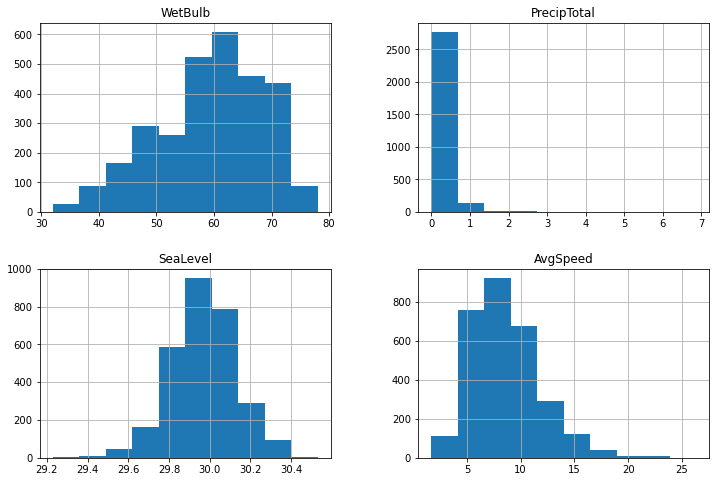

In [35]:
# visualise histogram of columns with null values
weather[['WetBulb','PrecipTotal', 'SeaLevel', 'AvgSpeed']].hist(figsize=(12, 8));

plt.savefig('../plots/histogram-of-cols-with-nulls.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Observation:**

`WetBulb` appears to be negatively skewed. `PrecipTotal` appears to be positively skewed. `SeaLevel` appears to be normally distributed with somewhat of a negative skew. `AvgSpeed` appears to be normally distributed with somewhat of a positive skew. In this case, since the number of missing values for each variable is small (<10), we will assume that the values are missing completely at random.

Given that the weather dataset has one observation row for each calendar day between 2007 and 2014, it would not be prudent to drop rows with missing values as that would result in unaccounted days in the dataset. The missing values will be rectified by imputation. As for the choice of imputation, imputation with the median (vs mean) was done for all variables so as not to add any further skew to the underlying distributions.

In [36]:
# impute null values in these columns with their respective medians
weather['WetBulb'] = weather['WetBulb'].fillna(weather['WetBulb'].median())
weather['PrecipTotal'] = weather['PrecipTotal'].fillna(weather['PrecipTotal'].median())
weather['SeaLevel'] = weather['SeaLevel'].fillna(weather['SeaLevel'].median())
weather['AvgSpeed'] = weather['AvgSpeed'].fillna(weather['AvgSpeed'].median())

In [37]:
# convert date column to datetime
weather['Date'] = pd.to_datetime(weather['Date'])

# weather.set_index('Date', inplace=True)

In [38]:
# check out data types of columns
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   float64       
 3   Tmin         2944 non-null   float64       
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   float64       
 6   WetBulb      2944 non-null   float64       
 7   Heat         2944 non-null   float64       
 8   Cool         2944 non-null   float64       
 9   PrecipTotal  2944 non-null   float64       
 10  SeaLevel     2944 non-null   float64       
 11  ResultSpeed  2944 non-null   float64       
 12  ResultDir    2944 non-null   float64       
 13  AvgSpeed     2944 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 322.1 KB


In [39]:
# check for null values
weather.isnull().sum().to_frame().T

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# check out clean dataframe
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.82,1.7,27.0,9.2
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.82,2.7,25.0,9.6
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,30.09,13.0,4.0,13.4
3,2,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,30.08,13.3,2.0,13.4
4,1,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,30.12,11.7,7.0,11.9


#### Clean Spray Dataset

In [41]:
# check out first 5 rows
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [42]:
# check out shape
spray.shape

(14835, 4)

In [43]:
# check for duplicates
spray[spray.duplicated()]

,Date,Time,Latitude,Longitude
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.986460,-87.794225
1026,2011-09-07,7:44:32 PM,41.986460,-87.794225
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [44]:
# drop duplicates
print('Shape Before Dropping Duplicates:', spray.shape)
spray.drop_duplicates(ignore_index=True, inplace=True)
print('Shape After Dropping Duplicates:', spray.shape)

Shape Before Dropping Duplicates: (14835, 4)
Shape After Dropping Duplicates: (14294, 4)


In [45]:
# drop unnecessary columns
spray.drop(columns='Time', inplace=True)

In [46]:
# convert date column to datetime
spray['Date'] = pd.to_datetime(spray['Date'])

# spray.set_index('Date', inplace=True)

In [47]:
# check out data types of columns
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14294 non-null  datetime64[ns]
 1   Latitude   14294 non-null  float64       
 2   Longitude  14294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 335.1 KB


In [48]:
# check for null values
spray.isnull().sum().to_frame().T

,Date,Latitude,Longitude
0,0,0,0


In [49]:
# check out clean dataframe
spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


#### Clean Kaggle Dataset

In [50]:
# check out first 5 rows
kaggle.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [51]:
# check out shape
kaggle.shape

(116293, 11)

In [52]:
# check for duplicates
kaggle[kaggle.duplicated()]

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy


In [53]:
# drop duplicates
print('Shape Before Dropping Duplicates:', kaggle.shape)
kaggle.drop_duplicates(ignore_index=True, inplace=True)
print('Shape After Dropping Duplicates:', kaggle.shape)

Shape Before Dropping Duplicates: (116293, 11)
Shape After Dropping Duplicates: (116293, 11)


In [54]:
# drop unnecessary columns
kaggle.drop(columns=['Block', 'Street', 'Address', 'AddressNumberAndStreet', 'AddressAccuracy'], inplace=True)

In [55]:
# convert date column to datetime
kaggle['Date'] = pd.to_datetime(kaggle['Date'])

# kaggle.set_index('Date', inplace=True)

In [56]:
# check out data types of columns
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Id         116293 non-null  int64         
 1   Date       116293 non-null  datetime64[ns]
 2   Species    116293 non-null  object        
 3   Trap       116293 non-null  object        
 4   Latitude   116293 non-null  float64       
 5   Longitude  116293 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.3+ MB


In [57]:
# check for null values
kaggle.isnull().sum().to_frame().T

,Id,Date,Species,Trap,Latitude,Longitude
0,0,0,0,0,0,0


In [58]:
# check out clean dataframe
kaggle.head()

,Id,Date,Species,Trap,Latitude,Longitude
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


### Feature Engineering

#### Engineer Trap Dataset

In [59]:
# check out first 5 rows
trap.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [60]:
# sum number of mosquitoes for rows with the exact same date, species, trap, latitude, longitude, & wnv

# rationale:
# (this is an excerpt from the trap dataset description on kaggle)
#   These test results are organized in such a way that when the number of mosquitoes exceed 50, 
#   they are split into another record (another row in the dataset), 
#   such that the number of mosquitoes are capped at 50. 

print('Shape Before Summing Number Of Mosquitoes:', trap.shape)
trap = trap.groupby(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'WnvPresent'], as_index=False).sum()
print('Shape After Summing Number Of Mosquitoes:', trap.shape)

Shape Before Summing Number Of Mosquitoes: (9693, 7)
Shape After Summing Number Of Mosquitoes: (8610, 7)


In [61]:
# extract day, month, & year from date column into individual columns
trap['Day'] = pd.DatetimeIndex(trap['Date']).day
trap['Month'] = pd.DatetimeIndex(trap['Date']).month
trap['Year'] = pd.DatetimeIndex(trap['Date']).year
trap.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent,NumMosquitos,Day,Month,Year
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,0,1,29,5,2007
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0,1,29,5,2007
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0,1,29,5,2007
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,1,29,5,2007
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,0,1,29,5,2007


#### Engineer Weather Dataset

In [62]:
# check out first 5 rows
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.82,1.7,27.0,9.2
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.82,2.7,25.0,9.6
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,30.09,13.0,4.0,13.4
3,2,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,30.08,13.3,2.0,13.4
4,1,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,30.12,11.7,7.0,11.9


In [63]:
# define a function to calculate relative humidity

# rationale:
# (this is an excerpt from the weather dataset description on kaggle)
#   It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet.

# references used for relative humidity formula:
#   https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html
#   https://journals.ametsoc.org/view/journals/bams/86/2/bams-86-2-225.xml

def find_RH(row):
    """
    This function calculates the relative humidity (in %)
    from dry bulb temperature (in °F) and dew point temperature (in °F).
    """
    # convert dry bulb temperature from degrees fahrenheit to degrees celsius
    Tdb = row['Tavg']
    Tdb = (Tdb - 32) * (5/9)
    
    # convert dew point temperature from degrees fahrenheit to degrees celsius
    Tdp = row['DewPoint']
    Tdp = (Tdp - 32) * (5/9)
    
    # calculate relative humidity
    RH = 100 - 5 * (Tdb - Tdp)
    
    # this is the simplified equation to get relative humidity (in %) directly
    # from dry bulb temperature (in °F) and dew point temperature (in °F)
    # RH = 100 - (25/9) * (Tdb - Tdp)
        
    return RH

In [64]:
# create the column for relative humidity
weather['RH'] = weather.apply(find_RH, axis=1)
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.82,1.7,27.0,9.2,55.555556
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.82,2.7,25.0,9.6,52.777778
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,30.09,13.0,4.0,13.4,75.000000
3,2,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,30.08,13.3,2.0,13.4,72.222222
4,1,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,30.12,11.7,7.0,11.9,55.555556


In [65]:
# add coordinates to weather stations in dataframe

# rationale:
# (this is an excerpt from the weather dataset description on kaggle)
#   Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#   Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

stn_1_lat, stn_1_lon = 41.995, -87.933
stn_2_lat, stn_2_lon = 41.786, -87.752
                
weather['Latitude'] = weather['Station'].apply(lambda x: stn_1_lat if x == 1 else stn_2_lat)
weather['Longitude'] = weather['Station'].apply(lambda x: stn_1_lon if x == 1 else stn_2_lon)

weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH,Latitude,Longitude
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0.0,2.0,0.0,29.82,1.7,27.0,9.2,55.555556,41.995,-87.933
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0.0,3.0,0.0,29.82,2.7,25.0,9.6,52.777778,41.786,-87.752
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14.0,0.0,0.0,30.09,13.0,4.0,13.4,75.000000,41.995,-87.933
3,2,2007-05-02,60.0,43.0,52.0,42.0,47.0,13.0,0.0,0.0,30.08,13.3,2.0,13.4,72.222222,41.786,-87.752
4,1,2007-05-03,66.0,46.0,56.0,40.0,48.0,9.0,0.0,0.0,30.12,11.7,7.0,11.9,55.555556,41.995,-87.933


#### Engineer Trap & Weather Datasets

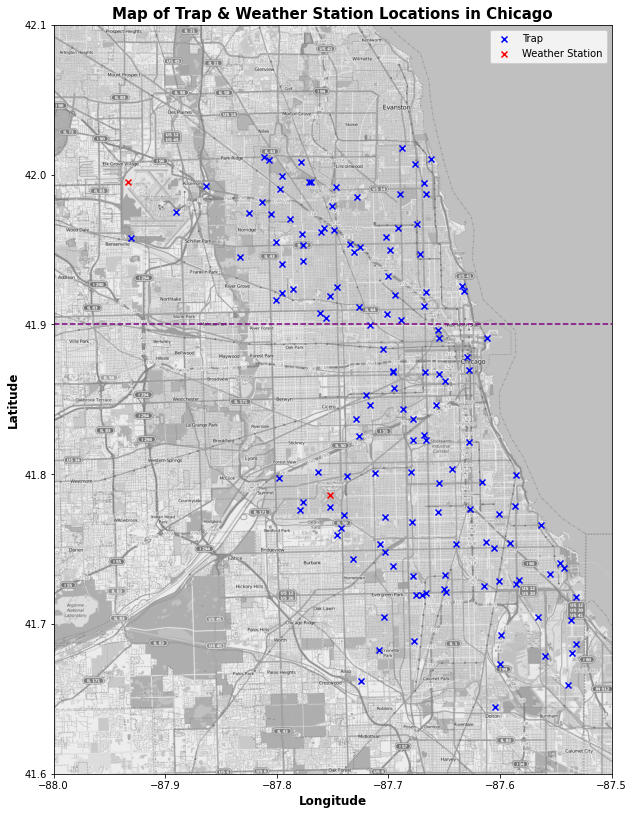

In [66]:
# plot map of chicago

mapdata = np.loadtxt("../assets/input/mapdata_copyright_openstreetmap_contributors.txt")
lon_lat_box = (-88.0, -87.5, 41.6, 42.1)
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

plt.figure(figsize=(10, 15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

plt.xlabel('Longitude', fontweight='bold', fontsize=12)
plt.ylabel('Latitude', fontweight='bold', fontsize=12)

# extract coordinates of trap & weather station locations

trap_map = trap[['Longitude', 'Latitude']].drop_duplicates().values
weather_map = weather[['Longitude', 'Latitude']].drop_duplicates().values

# visualise trap & weather station locations on the map

plt.axhline(41.9, ls='--', color='purple')
plt.scatter(trap_map[:, 0], trap_map[:, 1], marker='x', color='blue', label='Trap')
plt.scatter(weather_map[:, 0], weather_map[:, 1], marker='x', color='red', label='Weather Station')

plt.title('Map of Trap & Weather Station Locations in Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/trap-weather-map-with-line.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Observation:** There are 2 weather stations. The traps can be assigned to 1 of the 2 weather stations based on proximity. The latitude of 41.9 will be used to divide the traps into two clusters so that relevant weather data from the closest weather station can be assigned to each trap.

In [67]:
# assign each trap to the nearest weather station

# criteria:
#   trap has a latitude > 41.9 = assign to station 1
#   trap has a latitude <= 41.9 = assign to station 2

trap['Station'] = np.where(trap['Latitude'] > 41.9, 1, 2)
trap.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent,NumMosquitos,Day,Month,Year,Station
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,0,1,29,5,2007,2
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0,1,29,5,2007,1
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0,1,29,5,2007,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,1,29,5,2007,2
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,0,1,29,5,2007,1


In [68]:
# assign each trap with the relevant weather data for a certain date from the nearest weather station
# merge weather dataframe into trap dataframe based on columns for date & station

trap_weather = pd.merge(trap, weather.drop(columns=['Latitude', 'Longitude']), how='left', on=['Date', 'Station'])
trap_weather.head()

,Date,Species,Trap,Latitude,Longitude,WnvPresent,NumMosquitos,Day,Month,Year,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,0,1,29,5,2007,2,88.0,65.0,77.0,59.0,66.0,0.0,12.0,0.0,30.09,5.8,16.0,7.4,50.000000
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,0,1,29,5,2007,1,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5,55.555556
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,0,1,29,5,2007,1,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5,55.555556
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,1,29,5,2007,2,88.0,65.0,77.0,59.0,66.0,0.0,12.0,0.0,30.09,5.8,16.0,7.4,50.000000
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,0,1,29,5,2007,1,88.0,60.0,74.0,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5,55.555556


#### Engineer Spray Dataset

In [69]:
# extract day, week, month, & year from date column into individual columns
spray['Year'] = spray['Date'].dt.year
spray['Month'] = spray['Date'].dt.month
spray['Week'] = spray['Date'].dt.isocalendar().week
spray['Day'] = spray['Date'].dt.day
spray.head()

,Date,Latitude,Longitude,Year,Month,Week,Day
0,2011-08-29,42.391623,-88.089163,2011,8,35,29
1,2011-08-29,42.391348,-88.089163,2011,8,35,29
2,2011-08-29,42.391022,-88.089157,2011,8,35,29
3,2011-08-29,42.390637,-88.089158,2011,8,35,29
4,2011-08-29,42.390410,-88.088858,2011,8,35,29


#### Engineer Kaggle Dataset

In [70]:
# extract day, month, & year from date column into individual columns
kaggle['Day'] = pd.DatetimeIndex(kaggle['Date']).day
kaggle['Month'] = pd.DatetimeIndex(kaggle['Date']).month
kaggle['Year'] = pd.DatetimeIndex(kaggle['Date']).year
kaggle.head()

,Id,Date,Species,Trap,Latitude,Longitude,Day,Month,Year
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,11,6,2008
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,11,6,2008
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,11,6,2008
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,11,6,2008
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,11,6,2008


#### Engineer Kaggle & Weather Datasets

In [71]:
# assign each trap to the nearest weather station
kaggle['Station'] = np.where(kaggle['Latitude'] > 41.9, 1, 2)
kaggle.head()

,Id,Date,Species,Trap,Latitude,Longitude,Day,Month,Year,Station
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,11,6,2008,1
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,11,6,2008,1
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,11,6,2008,1
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,11,6,2008,1
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,11,6,2008,1


In [72]:
# assign each trap with the relevant weather data for a certain date from the nearest weather station
kaggle_weather = kaggle.merge(weather.drop(columns=['Latitude', 'Longitude']), how='left', on=['Date', 'Station'])
kaggle_weather.head()

,Id,Date,Species,Trap,Latitude,Longitude,Day,Month,Year,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,11,6,2008,1,86.0,61.0,74.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0,50.0
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,11,6,2008,1,86.0,61.0,74.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0,50.0
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,11,6,2008,1,86.0,61.0,74.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0,50.0
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,11,6,2008,1,86.0,61.0,74.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0,50.0
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,11,6,2008,1,86.0,61.0,74.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0,50.0


### Data Exporting

#### Export Trap Dataset (as Clean Train Dataset)

In [73]:
# rearrange columns
trap = trap[['Date', 'Day', 'Month', 'Year', 'Species', 'Trap', 'Latitude', 'Longitude', 'Station', 
             'NumMosquitos', 'WnvPresent']]

In [74]:
# final show of first 5 rows
trap.head()

,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,NumMosquitos,WnvPresent
0,2007-05-29,29,5,2007,CULEX PIPIENS,T096,41.731922,-87.677512,2,1,0
1,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,1,0
2,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,1,0
3,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,2,1,0
4,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,1,1,0


In [75]:
# final null value check
trap.isnull().sum().to_frame().T

,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,NumMosquitos,WnvPresent
0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# final shape check
trap.shape

(8610, 11)

In [77]:
# export clean dataframe
trap.to_csv('../data/train_clean.csv', index=False)

#### Export Weather Dataset

In [78]:
# rearrange columns
weather = weather[['Date', 'Station', 'Latitude', 'Longitude', 'Tmax', 'Tmin', 'Tavg', 'RH', 'DewPoint', 'WetBulb', 
                   'Heat', 'Cool', 'PrecipTotal', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']]

In [79]:
# final show of first 5 rows
weather.head()

,Date,Station,Latitude,Longitude,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,1,41.995,-87.933,83.0,50.0,67.0,55.555556,51.0,56.0,0.0,2.0,0.0,29.82,1.7,27.0,9.2
1,2007-05-01,2,41.786,-87.752,84.0,52.0,68.0,52.777778,51.0,57.0,0.0,3.0,0.0,29.82,2.7,25.0,9.6
2,2007-05-02,1,41.995,-87.933,59.0,42.0,51.0,75.000000,42.0,47.0,14.0,0.0,0.0,30.09,13.0,4.0,13.4
3,2007-05-02,2,41.786,-87.752,60.0,43.0,52.0,72.222222,42.0,47.0,13.0,0.0,0.0,30.08,13.3,2.0,13.4
4,2007-05-03,1,41.995,-87.933,66.0,46.0,56.0,55.555556,40.0,48.0,9.0,0.0,0.0,30.12,11.7,7.0,11.9


In [80]:
# final null value check
weather.isnull().sum().to_frame().T

,Date,Station,Latitude,Longitude,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# final shape check
weather.shape

(2944, 17)

In [82]:
# export clean dataframe
weather.to_csv('../data/weather_clean.csv', index=False)

#### Export Trap-Weather Dataset

In [83]:
# rearrange columns
trap_weather = trap_weather[['Date', 'Day', 'Month', 'Year', 'Species', 'Trap', 'Latitude', 'Longitude', 'Station', 
                             'NumMosquitos', 'WnvPresent', 
                             'Tmax', 'Tmin', 'Tavg', 'RH', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 
                             'PrecipTotal', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']]

In [84]:
# final show of first 5 rows
trap_weather.head()

,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,29,5,2007,CULEX PIPIENS,T096,41.731922,-87.677512,2,1,0,88.0,65.0,77.0,50.000000,59.0,66.0,0.0,12.0,0.0,30.09,5.8,16.0,7.4
1,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,1,0,88.0,60.0,74.0,55.555556,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5
2,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,1,0,88.0,60.0,74.0,55.555556,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5
3,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,2,1,0,88.0,65.0,77.0,50.000000,59.0,66.0,0.0,12.0,0.0,30.09,5.8,16.0,7.4
4,2007-05-29,29,5,2007,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,1,1,0,88.0,60.0,74.0,55.555556,58.0,65.0,0.0,9.0,0.0,30.11,5.8,18.0,6.5


In [85]:
# final null value check
trap_weather.isnull().sum().to_frame().T

,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# final shape check
trap_weather.shape

(8610, 24)

In [87]:
# export clean dataframe
trap_weather.to_csv('../data/train_weather_clean.csv', index=False)

#### Export Spray Dataset

In [88]:
# final show of first 5 rows
spray.head()

,Date,Latitude,Longitude,Year,Month,Week,Day
0,2011-08-29,42.391623,-88.089163,2011,8,35,29
1,2011-08-29,42.391348,-88.089163,2011,8,35,29
2,2011-08-29,42.391022,-88.089157,2011,8,35,29
3,2011-08-29,42.390637,-88.089158,2011,8,35,29
4,2011-08-29,42.390410,-88.088858,2011,8,35,29


In [89]:
# final null value check
spray.isnull().sum().to_frame().T

,Date,Latitude,Longitude,Year,Month,Week,Day
0,0,0,0,0,0,0,0


In [90]:
# final shape check
spray.shape

(14294, 7)

In [91]:
# export clean dataframe
spray.to_csv('../data/spray_clean.csv', index=False)

#### Export Kaggle Dataset (as Clean Test Dataset)

In [92]:
# rearrange columns
kaggle = kaggle[['Id', 'Date', 'Day', 'Month', 'Year', 'Species', 'Trap', 
                 'Latitude', 'Longitude', 'Station']]

In [93]:
# final show of first 5 rows
kaggle.head()

,Id,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station
0,1,2008-06-11,11,6,2008,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1
1,2,2008-06-11,11,6,2008,CULEX RESTUANS,T002,41.95469,-87.800991,1
2,3,2008-06-11,11,6,2008,CULEX PIPIENS,T002,41.95469,-87.800991,1
3,4,2008-06-11,11,6,2008,CULEX SALINARIUS,T002,41.95469,-87.800991,1
4,5,2008-06-11,11,6,2008,CULEX TERRITANS,T002,41.95469,-87.800991,1


In [94]:
# final null value check
kaggle.isnull().sum().to_frame().T

,Id,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station
0,0,0,0,0,0,0,0,0,0,0


In [95]:
# final shape check
kaggle.shape

(116293, 10)

In [96]:
# export clean dataframe
kaggle.to_csv('../data/test_clean.csv', index=False)

#### Export Kaggle-Weather Dataset

In [97]:
# rearrange columns
kaggle_weather = kaggle_weather[['Id', 'Date', 'Day', 'Month', 'Year', 'Species', 'Trap', 
                                 'Latitude', 'Longitude', 'Station',  
                                 'Tmax', 'Tmin', 'Tavg', 'RH', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 
                                 'PrecipTotal', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']]

In [98]:
# final show of first 5 rows
kaggle_weather.head()

,Id,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2008-06-11,11,6,2008,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,86.0,61.0,74.0,50.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0
1,2,2008-06-11,11,6,2008,CULEX RESTUANS,T002,41.95469,-87.800991,1,86.0,61.0,74.0,50.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0
2,3,2008-06-11,11,6,2008,CULEX PIPIENS,T002,41.95469,-87.800991,1,86.0,61.0,74.0,50.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0
3,4,2008-06-11,11,6,2008,CULEX SALINARIUS,T002,41.95469,-87.800991,1,86.0,61.0,74.0,50.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0
4,5,2008-06-11,11,6,2008,CULEX TERRITANS,T002,41.95469,-87.800991,1,86.0,61.0,74.0,50.0,56.0,64.0,0.0,9.0,0.0,29.99,8.9,18.0,10.0


In [99]:
# final null value check
kaggle_weather.isnull().sum().to_frame().T

,Id,Date,Day,Month,Year,Species,Trap,Latitude,Longitude,Station,Tmax,Tmin,Tavg,RH,DewPoint,WetBulb,Heat,Cool,PrecipTotal,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# final shape check
kaggle_weather.shape

(116293, 23)

In [101]:
# export clean dataframe
kaggle_weather.to_csv('../data/test_weather_clean.csv', index=False)

### Data Dictionary 

A list of the clean datasets is given below:

Trap Locations
* [`train_clean.csv`](../data/train_clean.csv): Clean Trap Locations Training Dataset
* [`test_clean.csv`](../data/test_clean.csv): Clean Trap Locations Testing Dataset

Weather Stataion Readings
* [`weather_clean.csv`](../data/weather_clean.csv): Clean Weather Station Readings Dataset

Spray Locations
* [`spray_clean.csv`](../data/spray_clean.csv): Clean Spray Locations Dataset

Trap Locations & Weather Station Readings
* [`train_weather_clean.csv`](../data/train_weather_clean.csv): Clean Trap Locations Training & Weather Station Readings Dataset
* [`test_weather_clean.csv`](../data/test_weather_clean.csv): Clean Trap Locations Testing & Weather Station Readings Dataset

A description of the variables in the clean datasets is given below:

**Table 1: Trap-Related Variables**

| Variable | Type | In Dataset<br>train_clean.csv | In Dataset<br>test_clean.csv | In Dataset<br>train_weather_clean.csv | In Dataset<br>test_weather_clean.csv | Description |
|:---|:---|:---|:---|:---|:---|:---|
| Id | integer | No | Yes | No | Yes | Id of the row for the Kaggle Challenge |
| Date | datetime | Yes | Yes | Yes | Yes | Date in YYYY-MM-DD the WNV test is performed |
| Day | integer | Yes | Yes | Yes | Yes | Day in DD the WNV test is performed |
| Month | integer | Yes | Yes | Yes | Yes | Month in MM the WNV test is performed |
| Year | integer | Yes | Yes | Yes | Yes | Year in YYYY the WNV test is performed |
| Species | object | Yes | Yes | Yes | Yes | Species of mosquitoes in the trap |
| Trap | object | Yes | Yes | Yes | Yes | Id of the trap |
| Latitude | float | Yes | Yes | Yes | Yes | Latitude of the trap |
| Longitude | float | Yes | Yes | Yes | Yes | Longitude of the trap |
| Station | integer | Yes | Yes | Yes | Yes | Assigned weather station to the trap |
| NumMosquitos | integer | Yes | No | Yes | No | Number of mosquitoes caught in the trap |
| WnvPresent | integer | Yes | No | Yes | No | 1 for presence of West Nile Virus in the trap<br>0 for absence of West Nile Virus in the trap |

**Table 2: Weather-Related Variables**

| Variable | Type | In Dataset<br>weather_clean.csv | In Dataset<br>train_weather_clean.csv | In Dataset<br>test_weather_clean.csv | Description |
|:---|:---|:---|:---|:---|:---|
| Date | datetime | Yes | Yes | Yes | Date in YYYY-MM-DD the weather readings are taken |
| Station | integer | Yes | Yes | Yes | 1 for Weather Station 1 (Lat 41.995 Lon -87.933)<br>2 for Weather Station 2 (Lat 41.786 Lon -87.752) |
| Latitude | float | Yes | No | No | Latitude of the weather station |
| Longitude | float | Yes | No | No | Longitude of the weather station |
| Tmax | float | Yes | Yes | Yes | Maximum dry bulb temperature in degrees Fahrenheit |
| Tmin | float | Yes | Yes | Yes | Minimum dry bulb temperature in degrees Fahrenheit |
| Tavg | float | Yes | Yes | Yes | Average dry bulb temperature in degrees Fahrenheit |
| RH | float | Yes | Yes | Yes | Relative humidity in percentage |
| DewPoint | float | Yes | Yes | Yes | Dew point temperature in degrees Fahrenheit |
| WetBulb | float | Yes | Yes | Yes | Wet bulb temperature in degrees Fahrenheit |
| Heat | float | Yes | Yes | Yes | 65 - Average dry bulb temperature in degrees Fahrenheit |
| Cool | float | Yes | Yes | Yes | Average dry bulb temperature in degrees Fahrenheit - 65 |
| PrecipTotal | float | Yes | Yes | Yes | Total precipitation in inches |
| SeaLevel | float | Yes | Yes | Yes | Average sea level pressure in inches of Hg |
| ResultSpeed | float | Yes | Yes | Yes | Resultant wind speed in miles per hour |
| ResultDir | float | Yes | Yes | Yes | Resultant wind direction in whole degrees |
| AvgSpeed | float | Yes | Yes | Yes | Average wind speed in miles per hour |

**Table 3: Spray-Related Variables**

| Variable | Type | In Dataset<br>spray_clean.csv | Description |
|:---|:---|:---|:---|
| Date | datetime | Yes | Date in YYYY-MM-DD the spray is conducted |
| Latitude | float | Yes | Latitude of the spray |
| Longitude | float | Yes | Longitude of the spray |
| Year | integer | Yes | Year in YYYY the spray is conducted|
| Month | integer | Yes | Month in MM the spray is conducted |
| Week | integer | Yes | Week of the Year the spray is conducted |
| Day | integer | Yes | Day in DD the spray is conducted|